In [67]:
import sys
sys.path.append("C:/Users/dzahariev/Desktop/Thesis/Thesis")
from src.training.wrappers.lightning_wrapper_encoder import LightningWrapperEncoder
from src.data.datamodules import SpikingDataModule
import torch
import matplotlib.pyplot as plt


In [70]:
checkpoint_path = "../weights/conv_stal_mnist_20250517_143936.cpkt"
checkpoint_path = "../weights/conv_stal_cifar10_20250517_145321.cpkt"
checkpoint = torch.load(checkpoint_path, weights_only=False)

In [71]:
model = LightningWrapperEncoder.load_from_checkpoint(checkpoint_path)

c:\Users\dzahariev\Desktop\Thesis\Thesis\myenv\Lib\site-packages\pytorch_lightning\utilities\parsing.py:209: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
c:\Users\dzahariev\Desktop\Thesis\Thesis\myenv\Lib\site-packages\pytorch_lightning\utilities\parsing.py:209: Attribute 'loss_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_fn'])`.


In [72]:
def plot_sample(x, y):
    C, _, _ = x.shape
    if C == 1:
        plt.figure(figsize=(3, 3))
        plt.imshow(x.squeeze().numpy(), cmap="gray")
    else:
        plt.figure(figsize=(3, 3))
        plt.imshow(x.numpy().transpose(1, 2, 0))
    plt.title(f"Label: {y}")
    plt.tight_layout()
    plt.show()


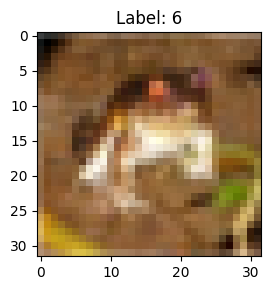

In [73]:
data_module = SpikingDataModule(
    dataset="cifar10",
    data_dir="C:/Users/dzahariev/Desktop/Thesis/Thesis/data",
    batch_size=128
)
data_module.setup()

sample = data_module.train_dataloader().dataset[0]
x, y = sample

plot_sample(x, y)


In [74]:
def plot_spikes(spikes, x):
    N, C, H, W = spikes.shape
    
    plt.figure(figsize=(10, 5))
    for i in range(N):
        plt.subplot(2, N+1, i+1)
        if C == 1:
            plt.imshow(spikes[i].squeeze().numpy(), cmap="gray")
        else:
            plt.imshow(spikes[i].numpy().transpose(1, 2, 0))
        plt.title(f"Spike {i+1}")
        plt.axis("off")
    plt.subplot(2, N+1, N+1)
    if C == 1:
        plt.imshow(x.squeeze().numpy(), cmap="gray")
    else:
        plt.imshow(x.squeeze().numpy().transpose(1, 2, 0))
    plt.title(f"Original")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


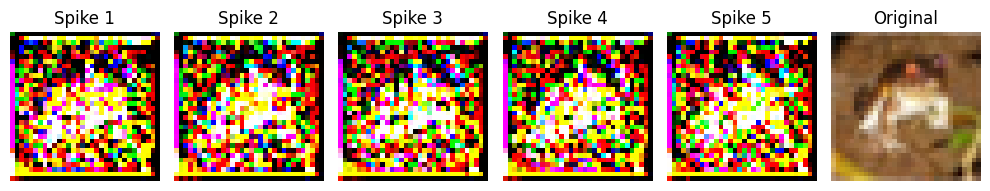

In [75]:
model.eval()
model.model.flatten_hw=False
with torch.no_grad():
    batch = x.unsqueeze(0)
    batch = batch.to(model.device)
    output = model(batch)
    spikes = output[0].squeeze(0)
plot_spikes(spikes, x)